# Scrape Crypto Prices with Selenium
* This project demonstrates the use of Selenium to scrape cryptocurrency price data from crypto.com

## Inspect crypto.com source code to obtain relevant XPaths
* First we go to https://crypto.com/price, which contains the price data for various cryptocurrencies
* The price data is stored in a table
    * Right-click the first row in the table and click "inspect"

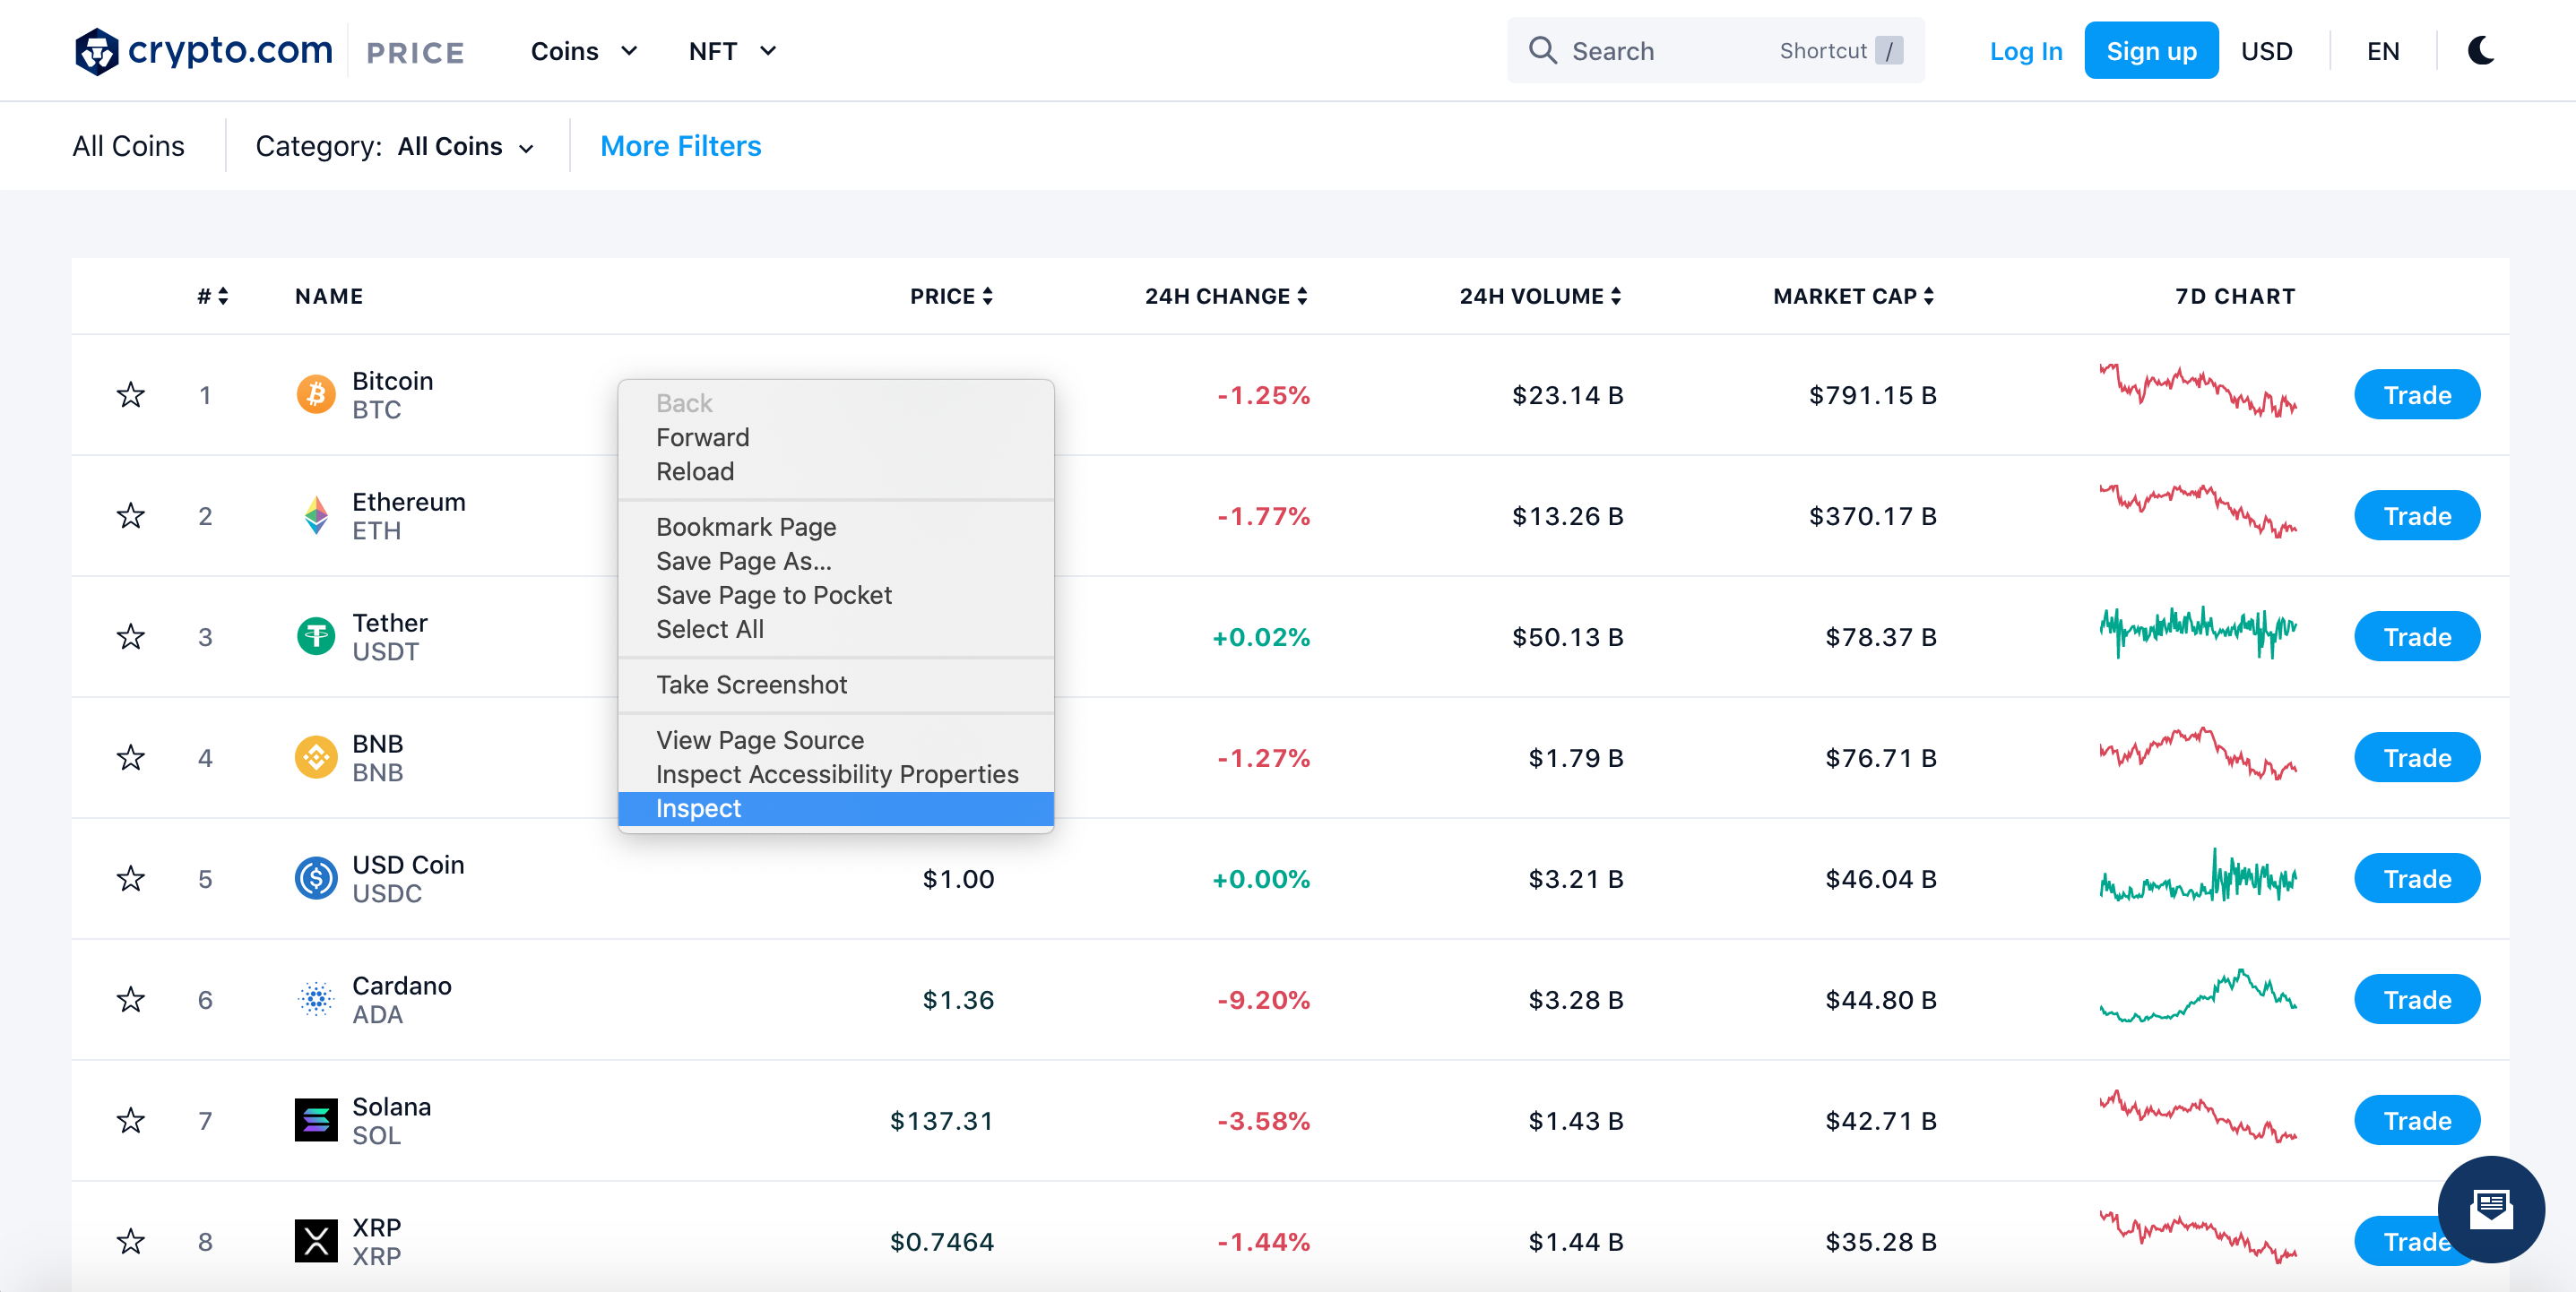

## Examine table element
* This is a dynamic website, so the table containing the price data is rendered in JavaScript
* Each cryptocurrency's price data is in a `<tr>` element
* Each data point (column) for a particular row is in a `<td>` element
* We need the XPaths for both the `<tr>` and `<td>` elements to scrape the data

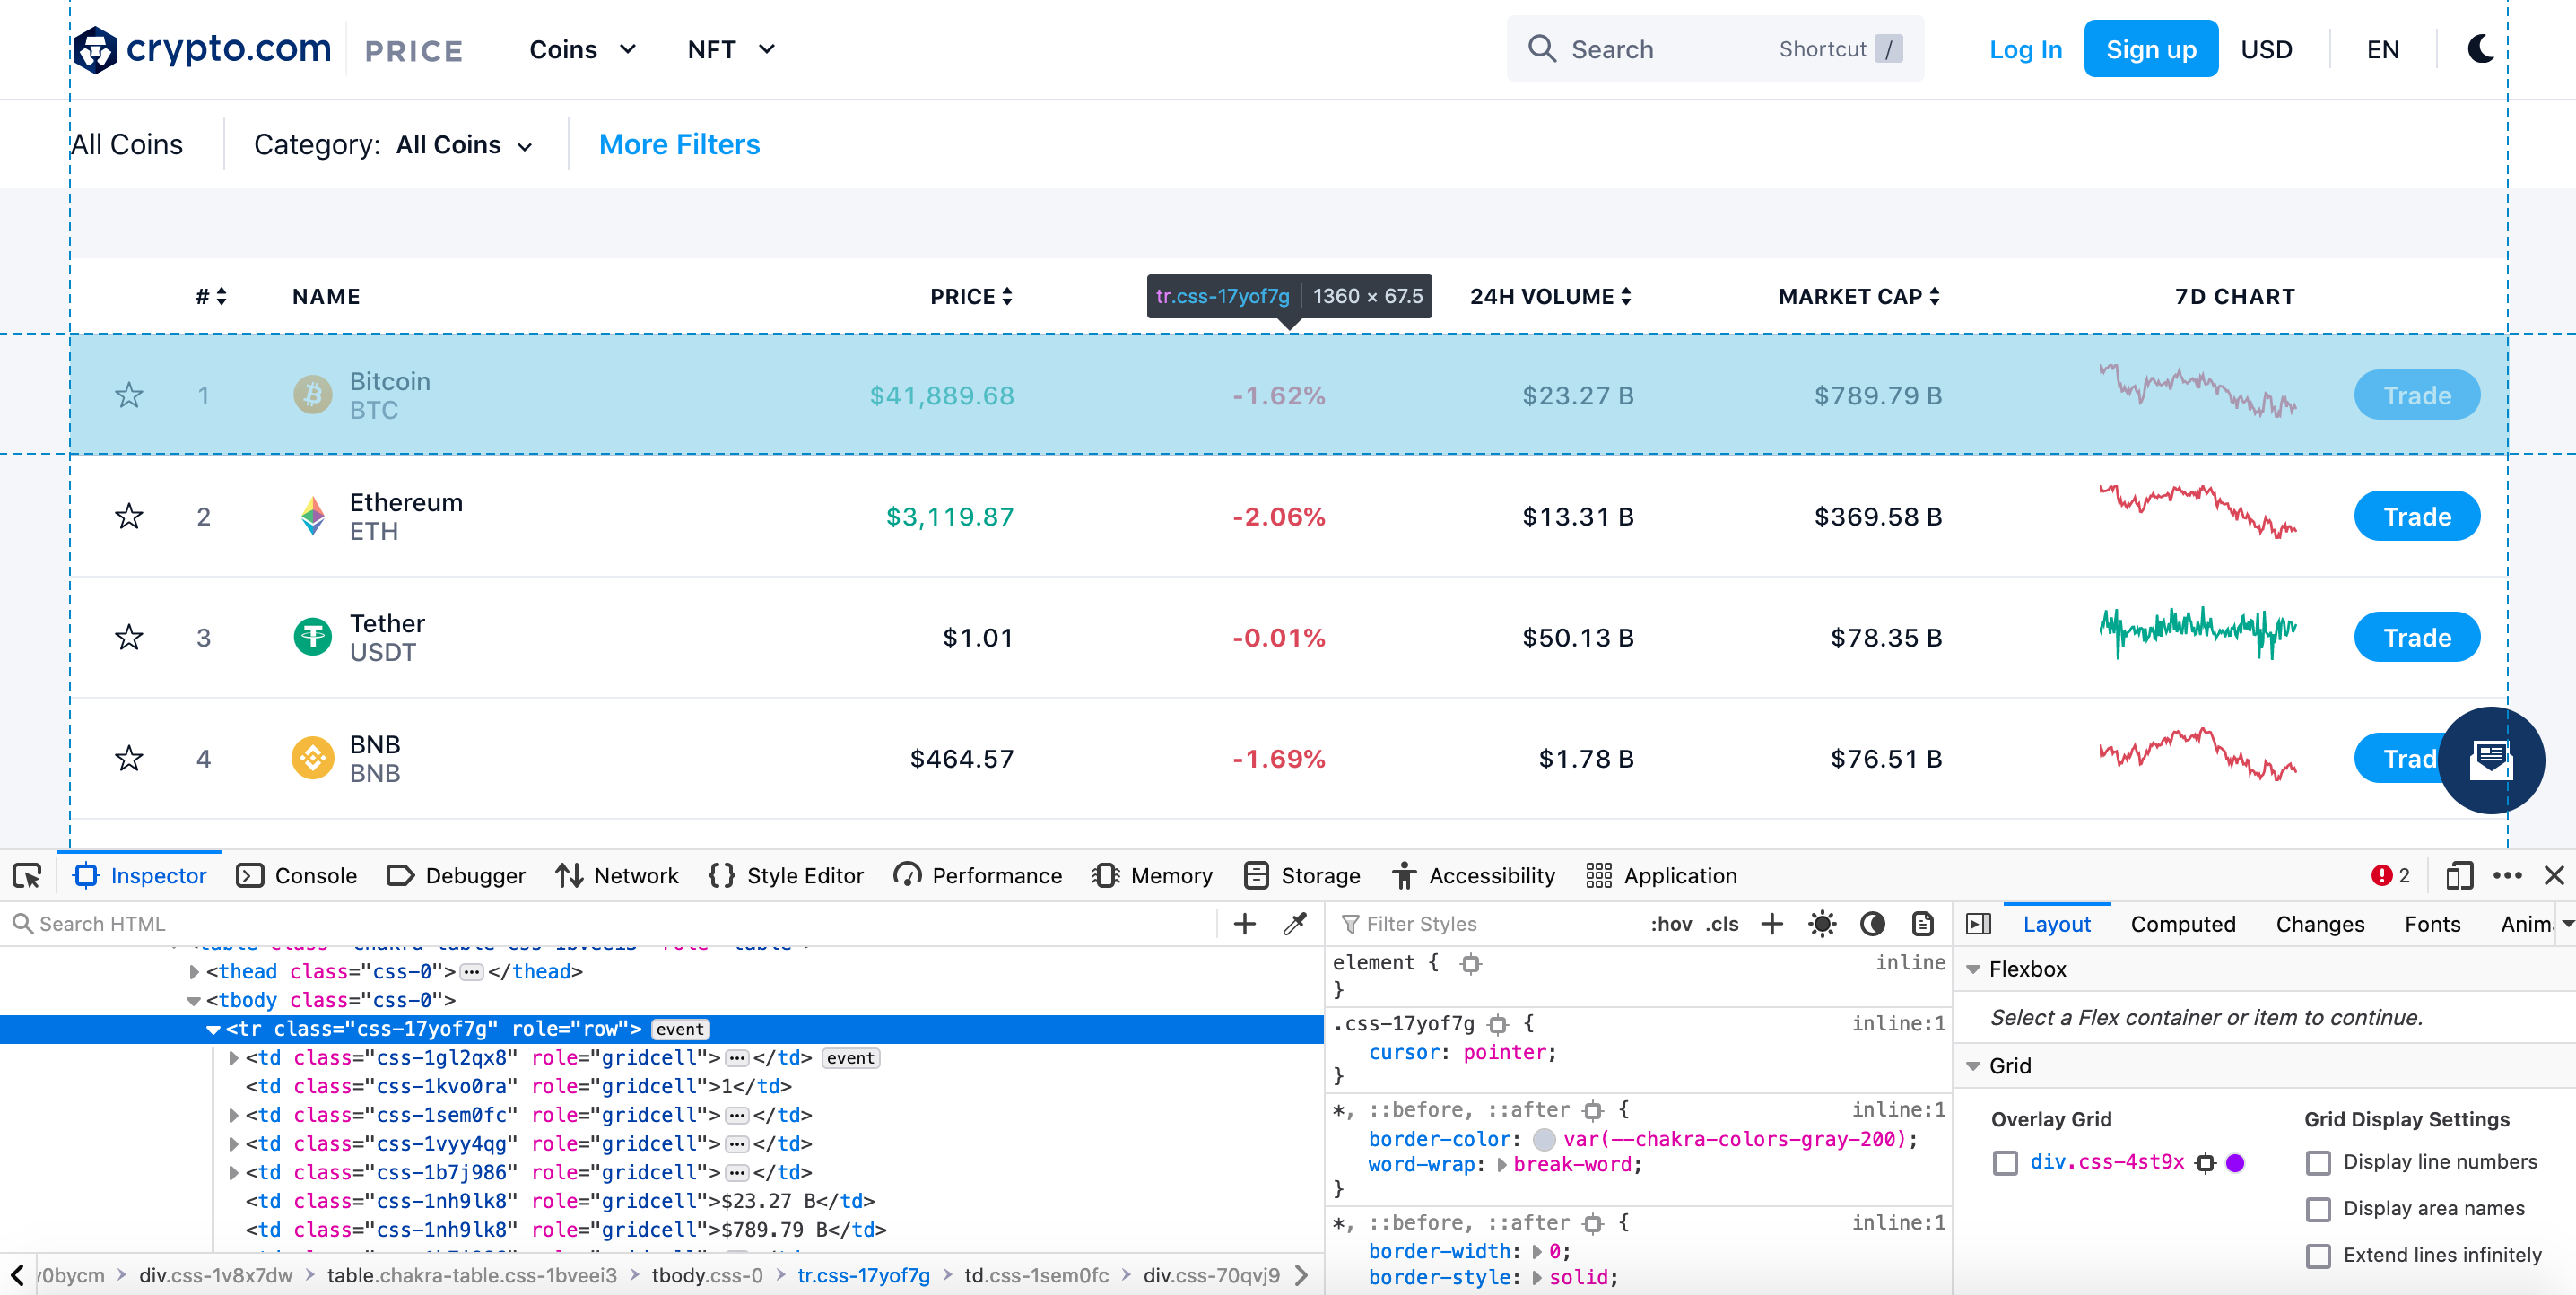

## Extract XPath for `<tr>` element
* Right-click the `<tr>` element and copy the XPath
* The XPath for the `<tr>` element is /html/body/div[1]/div[3]/div[2]/div/div[4]/div[1]/table/tbody/tr[1]

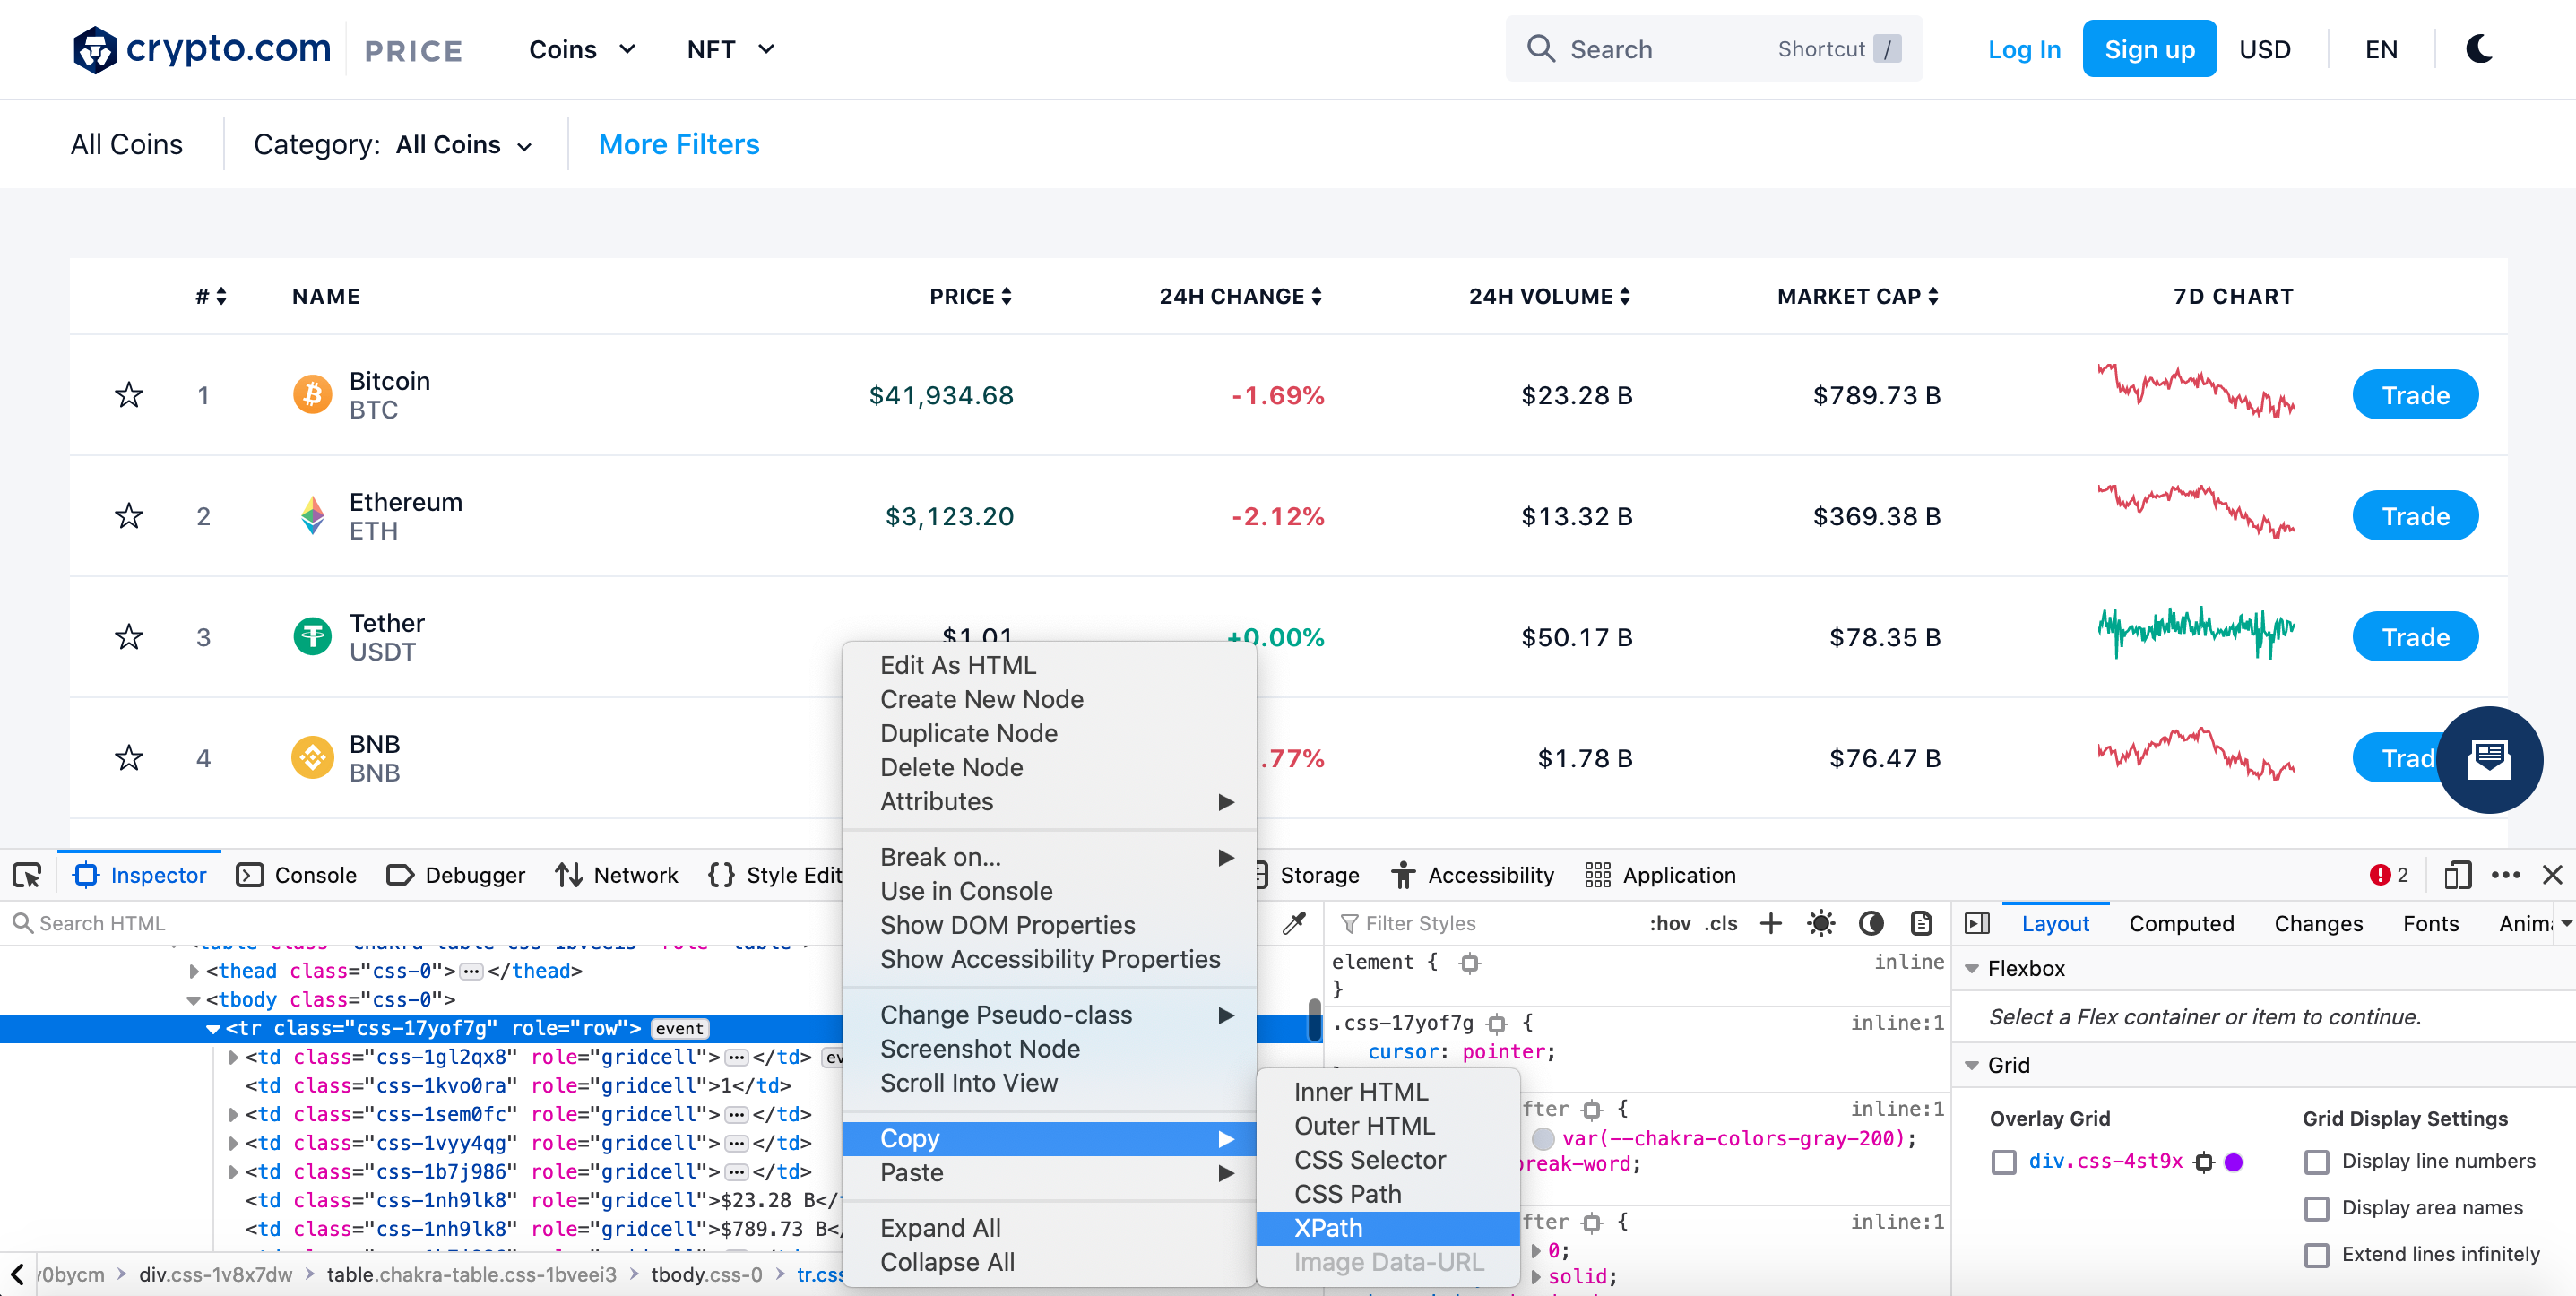

## Extract XPath for `<td>` element
* Now we select one of the `<td>` elements and copy the XPath in the same manner
    * We can also easily infer the XPath for `<td>` based on the XPath for `<tr>`
* The XPath for the `<td>` element is /html/body/div[1]/div[3]/div[2]/div/div[4]/div[1]/table/tbody/tr[1]/td[1]

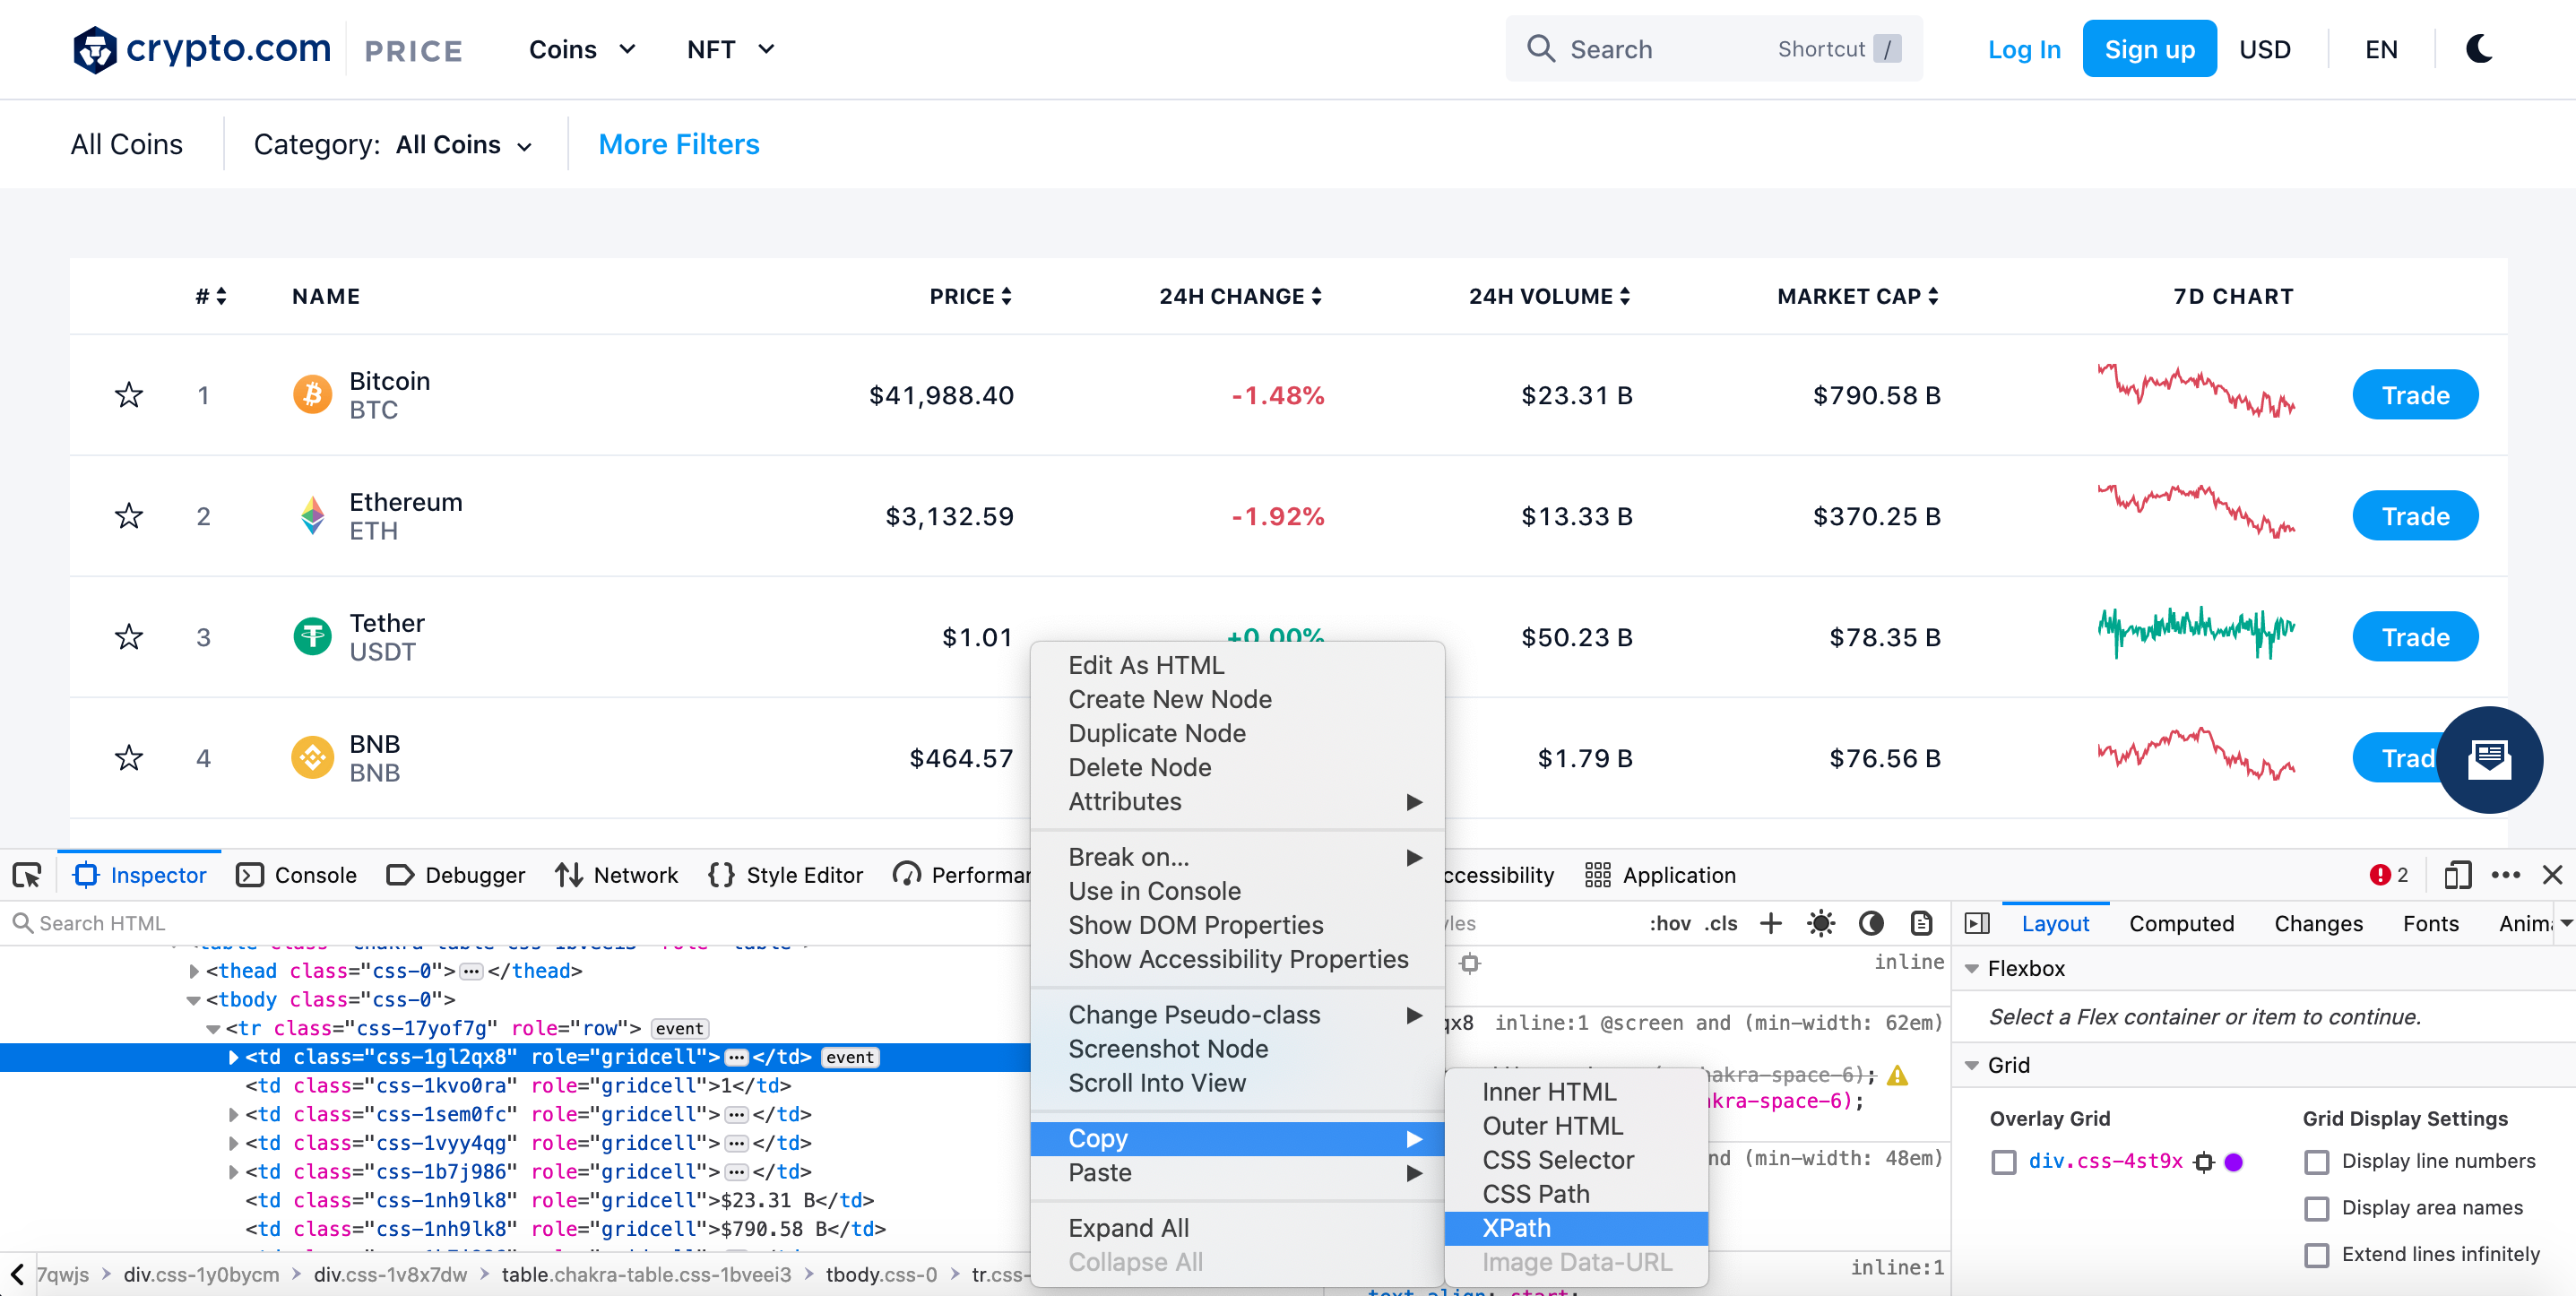

## Import libraries
* Now we can begin writing our scraper
* First we import the required libraries

In [17]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

## Instantiate the WebDriver
* For this project we will use headless ChromeDriver
    * Headless browsers don't have a UI, so they run faster
* We will also set the headless browser window size to 1920x1080
* We will use the `sleep()` method to give the page time to load

In [18]:
url = 'https://crypto.com/price'

chrome_options = Options()  
chrome_options.add_argument('--headless')
chrome_options.add_argument('--window-size=1920x1080')

driver = webdriver.Chrome(executable_path='./chromedriver', options=chrome_options)
driver.get(url)

time.sleep(3)

print(driver.title)

Top 50 Cryptocurrency Prices, Coin Market Cap, Price Charts And Historical Data | Crypto.com


## Calculate the number of rows and columns in the table
* Using both of the XPaths we copied, we can calculate the total rows and columns in the table
    * We will use this for our scraping operation
* We do this using the `find_elements_by_xpath()` method
* To find the total rows and columns we remove the index (in brackets) from the XPaths we copied
    * This will enable us to extract all the necessary `<tr>` and `<td>` elements

In [19]:
tr_xpath = '/html/body/div[1]/div[3]/div[2]/div/div[4]/div[1]/table/tbody/tr'
td_xpath = '/html/body/div[1]/div[3]/div[2]/div/div[4]/div[1]/table/tbody/tr[1]/td'

rows = 1+len(driver.find_elements_by_xpath(tr_xpath))
cols = 1+len(driver.find_elements_by_xpath(td_xpath))

print(rows)
print(cols)

51
10


## Initialize empty lists for the desired data
* There are six pieces of relevant data that we can extract from the table
    * Name
    * Symbol
    * Price
    * 24-hour change
    * 24-hour volume
    * Market cap
* The rest of the data points can be discarded (ignored) during the scraping operation

In [20]:
name = []
symbol = []
price = []
one_day_chg = []
one_day_vol = []
market_cap = []

## Loop through the table and collect the data
* We will use a double for loop to iterate through each column of each row
    * The range will be adjusted accordingly to ignore the columns we don't need
* A `try except` block is used to keep the scraper going in case it doesn't find an element
* For each column, we save the value by using the `find_element_by_xpath` method
    * We replace the bracketed `<tr>` and `<td>` indexes with the row index `i` and column index `j`, respectively
    * We use the `text` attribute to extract the text rather than a Selenium page object
* Then we check which column we are on and append the value to the appropriate list
* The cryptocurrency name and symbol are in the same column, separated by `\n`
    * We use the `split()` method to extract the name and symbol separately for this special case

In [21]:
xpath_prefix = '/html/body/div[1]/div[3]/div[2]/div/div[4]/div[1]/table/tbody/tr['

for i in range(1, rows):
    for j in range(3, cols-2):
        try:
            value = driver.find_element_by_xpath(xpath_prefix+str(i)+']/td['+str(j)+']').text
            if j == 3:
                name.append(value.split('\n')[0])
                symbol.append(value.split('\n')[1])
            elif j == 4:
                price.append(value)
            elif j == 5:
                one_day_chg.append(value)
            elif j == 6:
                one_day_vol.append(value)
            elif j == 7:
                market_cap.append(value)
        except NoSuchElementException:
            pass

## Store data in pandas DataFrame
* Now that our lists have been populated with the data, we can store the data in a pandas DataFrame
    * This will enable easy post-processing of the data for a multitude of use cases

In [22]:
crypto_data = {'Name': name, 'Symbol': symbol, 'Price': price, '24 Hour Change': one_day_chg,\
               '24 Hour Volume': one_day_vol, 'Market Cap': market_cap}

df = pd.DataFrame(data=crypto_data)

df.head()

Name Symbol       Price 24 Hour Change 24 Hour Volume Market Cap
0   Bitcoin    BTC  $37,059.32         -5.09%       $19.06 B  $700.84 B
1  Ethereum    ETH   $2,706.02         -3.98%       $13.84 B  $321.49 B
2    Tether   USDT       $1.01         +0.00%       $44.06 B   $77.98 B
3       BNB    BNB     $367.60         -4.82%        $1.28 B   $60.81 B
4  USD Coin   USDC       $1.00         -0.01%        $2.72 B   $50.42 B

## Quit the driver
* We can see from printing `df.head()` that our entries have been recorded successfully
* Now we close the WebDriver and finish the program

In [23]:
driver.quit()

## Complete scraper

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

url = 'https://crypto.com/price'

chrome_options = Options()  
chrome_options.add_argument('--headless')
chrome_options.add_argument('--window-size=1920x1080')

driver = webdriver.Chrome(executable_path='./chromedriver', options=chrome_options)
driver.get(url)

time.sleep(3)

print(driver.title)

tr_xpath = '/html/body/div[1]/div[3]/div[2]/div/div[4]/div[1]/table/tbody/tr'
td_xpath = '/html/body/div[1]/div[3]/div[2]/div/div[4]/div[1]/table/tbody/tr[1]/td'

rows = 1+len(driver.find_elements_by_xpath(tr_xpath))
cols = 1+len(driver.find_elements_by_xpath(td_xpath))

print(rows)
print(cols)

name = []
symbol = []
price = []
one_day_chg = []
one_day_vol = []
market_cap = []

xpath_prefix = '/html/body/div[1]/div[3]/div[2]/div/div[4]/div[1]/table/tbody/tr['

for i in range(1, rows):
    for j in range(3, cols-2):
        try:
            value = driver.find_element_by_xpath(xpath_prefix+str(i)+']/td['+str(j)+']').text
            if j == 3:
                name.append(value.split('\n')[0])
                symbol.append(value.split('\n')[1])
            elif j == 4:
                price.append(value)
            elif j == 5:
                one_day_chg.append(value)
            elif j == 6:
                one_day_vol.append(value)
            elif j == 7:
                market_cap.append(value)
        except NoSuchElementException:
            pass

crypto_data = {'Name': name, 'Symbol': symbol, 'Price': price, '24 Hour Change': one_day_chg,\
               '24 Hour Volume': one_day_vol, 'Market Cap': market_cap}

df = pd.DataFrame(data=crypto_data)

df.head()

driver.quit()